In [50]:
# y = f(X)
# y = x +1
# y ----> dependent variable
# x ----> independent variable    
# Temp = f(humidity) #simple linear regression
# height = f(age)
# price = f(nrooms, area, location) #multiple linear regression

In [51]:
import seaborn as sns
tip_df = sns.load_dataset('tips')
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

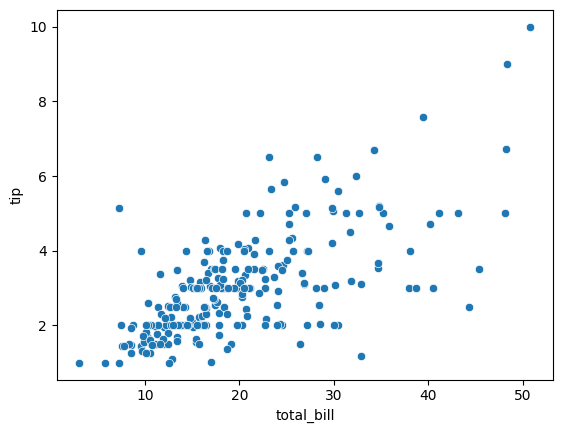

In [52]:
sns.scatterplot(x='total_bill', y='tip', data=tip_df)

<Axes: xlabel='total_bill', ylabel='tip'>

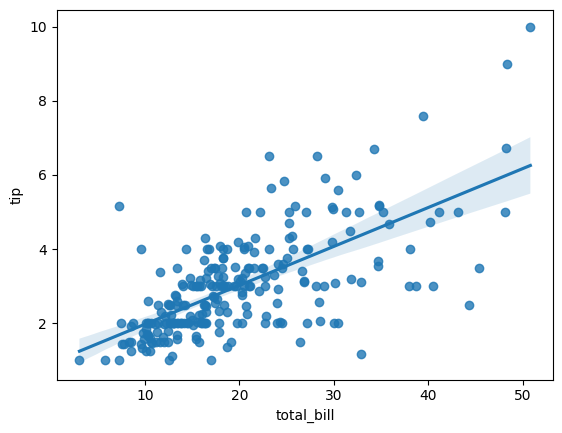

In [53]:
sns.regplot(x='total_bill', y='tip', data=tip_df)

In [54]:
#y = mx +c
y = 1.5*6 + 1.1
y

10.1

In [55]:
# y = b0*x0 + b1*x1 + b2*x2 + ....+ bn*xn + c + error

In [56]:
import pandas as pd
energy_df = pd.read_csv('appliance_energy.csv')
energy_df.head()

,Temperature (°C),Energy Consumption (kWh)
0,22.490802,2.292604
1,34.014286,3.251925
2,29.639879,3.009868
3,26.973170,1.703533
4,18.120373,1.702201


In [57]:
#rename the column
energy_df = energy_df.rename(columns={"Temperature (°C)": "temperature", "Energy Consumption (kWh)": "energy_consumption"})
energy_df.head()

,temperature,energy_consumption
0,22.490802,2.292604
1,34.014286,3.251925
2,29.639879,3.009868
3,26.973170,1.703533
4,18.120373,1.702201


<Axes: xlabel='temperature', ylabel='energy_consumption'>

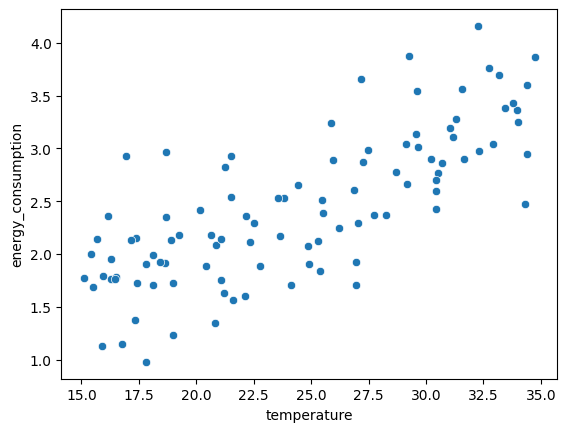

In [58]:
sns.scatterplot(x='temperature', y='energy_consumption', data=energy_df)

In [59]:
x= energy_df['temperature']
y = energy_df['energy_consumption']

In [60]:
x[:5]

0    22.490802
1    34.014286
2    29.639879
3    26.973170
4    18.120373
Name: temperature, dtype: float64

In [61]:
y[:5]

0    2.292604
1    3.251925
2    3.009868
3    1.703533
4    1.702201
Name: energy_consumption, dtype: float64

In [62]:
#split the data into training and testing data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [63]:
y_train.shape

(80,)

In [64]:
y.shape

(100,)

In [65]:
x.shape

(100,)

In [67]:
#selecting the algorithm
from sklearn.linear_model import LinearRegression
my_model = LinearRegression()
#train the model
my_model.fit(X_train.values.reshape(-1,1),y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [69]:
y_pred = my_model.predict(X_train.values.reshape(-1,1))
y_pred[:5]

array([3.23020678, 3.16783954, 1.93073442, 1.63333274, 3.34718567])

In [70]:
y_test[:5]

83    1.955394
53    3.037917
70    2.426014
45    2.370351
44    2.413076
Name: energy_consumption, dtype: float64

In [72]:
#Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print("Mean Squared Error:", f"{mse:.2f}")
print("R-squared Score:", f"{r2:.2f}")

Mean Squared Error: 0.21
R-squared Score: 0.56


In [73]:
my_model.coef_

array([0.08996618])

In [74]:
my_model.intercept_

np.float64(0.22196391661907677)

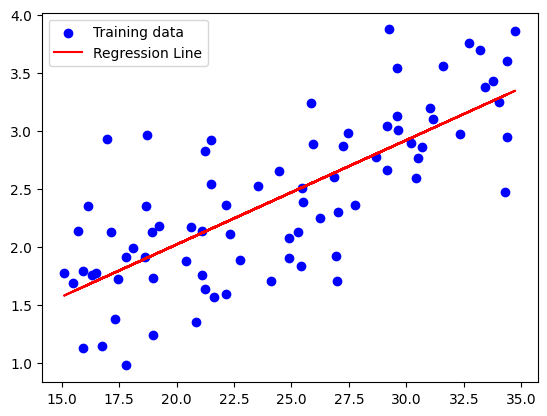

In [75]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, y_pred, color='red', label='Regression Line')
plt.legend()
plt.show()